In [48]:
# Felipe Carvalho Pereira
# Ra: 1900614
# E-mail: felipe.pereira@aluno.faculdadeimpacta.com.br

# João Vitor Peirera 
# RA 1801990
# Joao.pereira@aluno.faculdadeimpacta.com.br

In [49]:
# Importando os módulos nescessários
import csv
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

# 1. (1,0) Leia a base de dados e exiba os dados brutos no Jupyter Notebook.

In [50]:
student = pd.read_csv('student-por.csv', encoding = 'UTF-8', sep = ';', header = 0)

In [51]:
student.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


# 2.(1,0) Pelo cenário de negócio e ideia criado com base das informações, obtida da base e metadados.
Faremos uma relação entre o "studytime" e "G3" para analisar se o tempo de estudo influenciou no desempenho das notas finais. No segundo modelo, será reaizada uma regressão linear entre as notas G1, G2 e G3.

# 3.(1,0) Pelo primeiro modelo criado.

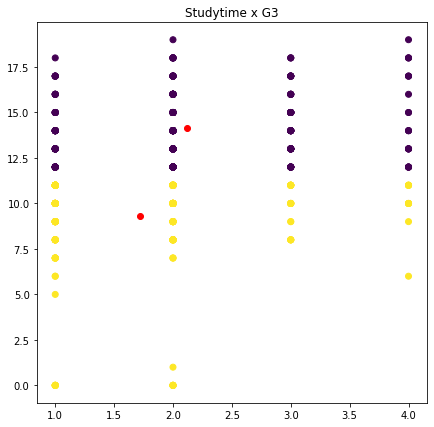

In [38]:
x = student.studytime.values
y = student.G3.values
grafico1 = KMeans(n_clusters=2)
grupos = grafico1.fit_predict(student[['studytime','G3']].values)
plt.figure(figsize=(7,7))
plt.scatter(x, y, c=grupos);
plt.title("Studytime x G3")
plt.scatter(grafico1.cluster_centers_[:, 0],grafico1.cluster_centers_[:,1], c='red');

# 4.(1,0) Pelo segundo modelo criado.

In [43]:
x = student[["G1", "G2"]].values
y = student["G3"].values
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size= 0.3)
model = LinearRegression()
model.fit(x_train, y_train)
model = LinearRegression()
model.fit(x_test, y_test)
y_pred = model.predict(x_test)
y_pred

array([12.24023792, 14.46479081, 13.28826783, 12.24023792, 12.24023792,
       13.28826783, 13.15977475, 10.27267117, 14.33629773,  9.35313434,
       17.09490824, 16.30386448, 11.57768723, 10.80672878,  8.17661136,
       12.49722407, 14.72177696, 13.54525398, 13.28826783, 14.33629773,
        8.04811828,  9.35313434, 12.11174484,  9.48162741, 13.54525398,
       11.32070108, 13.54525398, 12.49722407, 13.54525398, 12.24023792,
       14.33629773, 15.38432764, 12.62571714,  9.09614819,  8.30510443,
       14.46479081, 11.19220801,  9.35313434,  7.25707452, 10.01568502,
       12.24023792, 10.67823571, 17.35189439, 10.27267117, 13.54525398,
       11.19220801, 10.40116425,  9.22464126, 10.1441781 , 17.60888054,
       18.52841737, 17.22340131,  5.03252163, 16.56085063, 11.19220801,
       10.93522186,  6.33753769, 10.40116425, 10.40116425, 15.25583457,
       13.54525398,  9.22464126, 12.77429553, 15.38432764, 12.49722407,
        5.41800085, 14.46479081,  7.25707452, 15.51282072, 13.15

Text(0.5, 1.0, 'Regressão linear entre as notas')

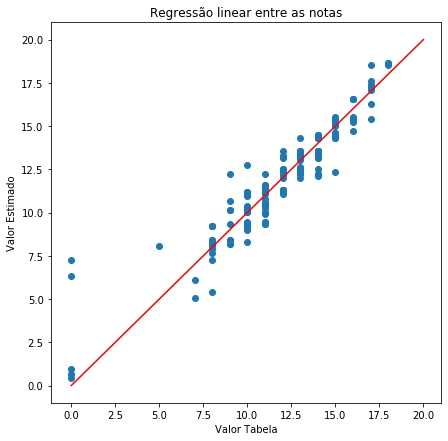

In [47]:
plt.figure (figsize = (7,7))
plt.xlabel("Valor Tabela")
plt.ylabel("Valor Estimado")
plt.plot([0,20], [0,20], c='r')
plt.scatter(y_test, y_pred);
plt.title("Regressão linear entre as notas")

# 5.(1,0) Pela argumentação e análise dos dados, obtidos nos dois modelos, alinhado como cenário de negócio criado.
No primeiro modelo Kmeans, podeos notar que o tempo dedicado aos estudos nitidamente influencia nas notas. Se observarmos os alunos que estão nas faixas 3 e 4, temos menor quantidade de notas baixas se comparado com 1 e 2.
No segundo modelo usamos a regressão linear, observa-se que a medida em que aumentam as notas em G1 e G2 maior a nota em G3.